In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head()

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.select_dtypes("object").nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

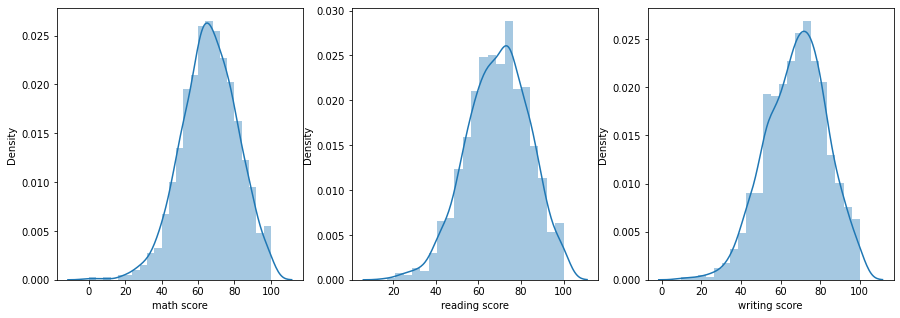

In [ ]:
#distplot of scores 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df['math score'])
plt.subplot(1,3,2)
sns.distplot(df['reading score'])
plt.subplot(1,3,3)
sns.distplot(df['writing score'])
plt.show()

Conclusions from the distplot:Density of math score is highest between 60-80(around 70) whereas the densities of reading and writinf scores are higher around 80.

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

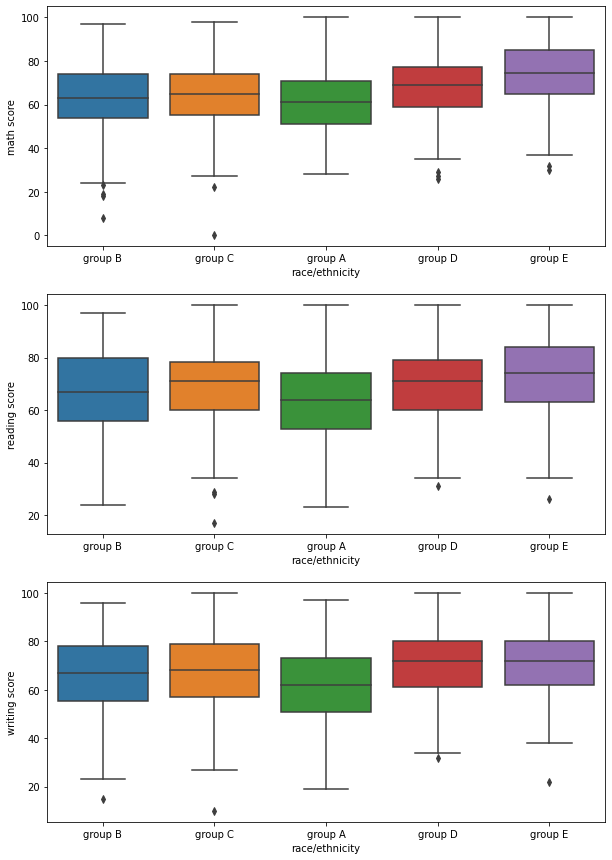

In [ ]:
#boxplot of race/ethnicity vs scores
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.boxplot(data=df,x='race/ethnicity',y='math score')
plt.subplot(3,1,2)
sns.boxplot(data=df,x='race/ethnicity',y='reading score')
plt.subplot(3,1,3)
sns.boxplot(data=df,x='race/ethnicity',y='writing score')
plt.show()

Conclusions from the boxplot: It can be clearly seen that the students from Group E scored better than the students from other groups in math.group E students are slightly ahead in reading scores as well. students from all the groups except group A performed equally in writing.

In [ ]:
#Let's create add column in the dataset and take the average of all 3 scores as readings.
df['average']=(df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
#let the minimum marks to pass the exam is 50
#then let's add another column 'PASS/FAIL' to check whether a student passed or failed in the exam
df['PASS/FAIL']=np.where(df['average']>50,'PASS','FAIL')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,PASS/FAIL
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,PASS
1,female,group C,some college,standard,completed,69,90,88,82.333333,PASS
2,female,group B,master's degree,standard,none,90,95,93,92.666667,PASS
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,FAIL
4,male,group C,some college,standard,none,76,78,75,76.333333,PASS


In [ ]:
df['PASS/FAIL'].value_counts()

PASS    891
FAIL    109
Name: PASS/FAIL, dtype: int64

In [ ]:
df[(df['PASS/FAIL']=='PASS')&(df['gender']=='female')]['PASS/FAIL'].count()

474

In [ ]:
df[(df['PASS/FAIL']=='PASS')&(df['gender']=='male')]['PASS/FAIL'].count()

417

In [ ]:
P=(891/1000)*100
FP=(474/518)*100
MP=(418/482)*100

In [ ]:
print('Percentage of total students passed:',P,'%')
print('Percentage of total female students passed:',FP,'%')
print('Percentage of total male students passed:',MP,'%')

Percentage of total students passed: 89.1 %
Percentage of total female students passed: 91.5057915057915 %
Percentage of total male students passed: 86.72199170124482 %


In [ ]:
#now let's give grades to each student based on their average score.
#add another column to the dataset to note student's grades
conditions=[(df['average']>=90),
            (df['average']>=80) & (df['average']<90),
            (df['average']>=70) & (df['average']<80),
            (df['average']>=60) & (df['average']<70),
            (df['average']>=50) & (df['average']<60),
            (df['average']<50)]

values=['A','B','C','D','E','F']
df['grades']=np.select(conditions,values)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,PASS/FAIL,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,PASS,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,PASS,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,PASS,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,FAIL,F
4,male,group C,some college,standard,none,76,78,75,76.333333,PASS,C


In [ ]:
df['grades'].value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: grades, dtype: int64

In [ ]:
A=(52/1000)*100
print('Percentage of total students who recieved A grade:',A,'%')

Percentage of total students who recieved A grade: 5.2 %


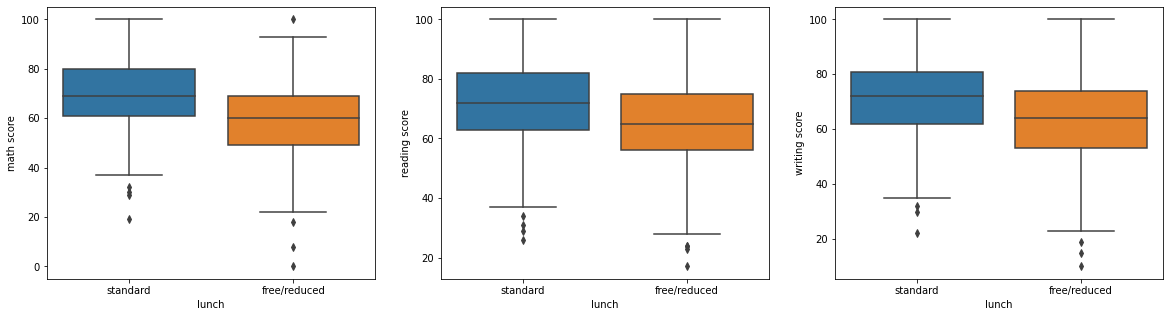

In [ ]:
#boxplots of lunch vs scores
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='lunch',y='math score')
plt.subplot(1,3,2)
sns.boxplot(data=df,x='lunch',y='reading score')
plt.subplot(1,3,3)
sns.boxplot(data=df,x='lunch',y='writing score')
plt.show()

It can be observed that students having standard lunch scored better than students having free/reduced lunch

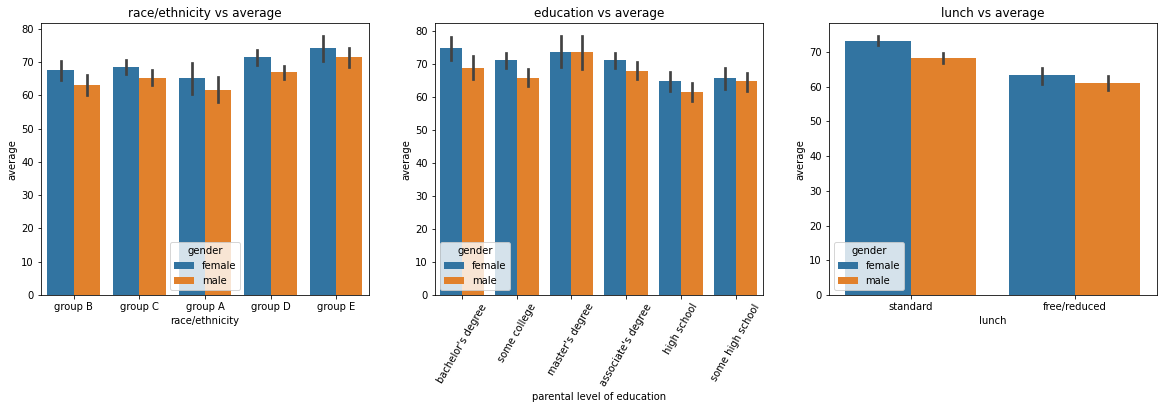

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('race/ethnicity vs average')
sns.barplot(data=df,x='race/ethnicity',y='average',hue='gender')
plt.subplot(1,3,2)
plt.title('education vs average')
sns.barplot(data=df,x='parental level of education',y='average',hue='gender')
plt.xticks(rotation=60)
plt.subplot(1,3,3)
plt.title('lunch vs average')
sns.barplot(data=df,x='lunch',y='average',hue='gender')
plt.show()

In [ ]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [ ]:
df[(df['PASS/FAIL']=='PASS')&(df['test preparation course']=='completed')]['PASS/FAIL'].count()

338

In [ ]:
df[(df['PASS/FAIL']=='PASS')&(df['test preparation course']=='none')]['PASS/FAIL'].count()

553

In [ ]:
C=(358/1000)*100
CP=(338/358)*100
NP=(553/642)*100

In [ ]:
print('Percentage of total students who completed test preparation course:',C,'%')
print('Percentage of total students who passed after completing test preparation course:',CP,'%')
print('Percentage of total students who passed with no test preparation course:',NP,'%')

Percentage of total students who completed test preparation course: 35.8 %
Percentage of total students who passed after completing test preparation course: 94.41340782122904 %
Percentage of total students who passed with no test preparation course: 86.13707165109035 %


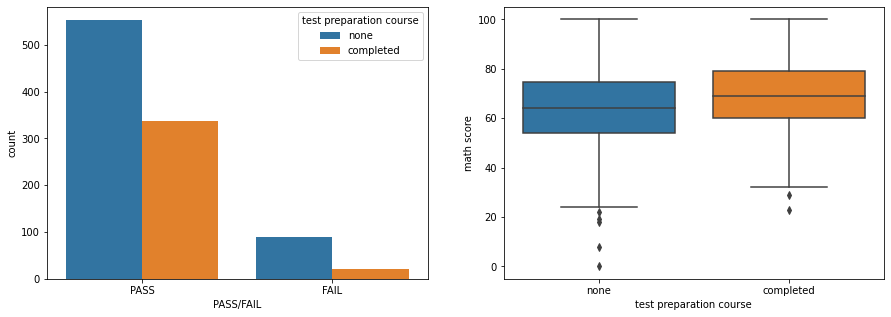

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='PASS/FAIL',hue='test preparation course')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='test preparation course',y='math score')
plt.show()

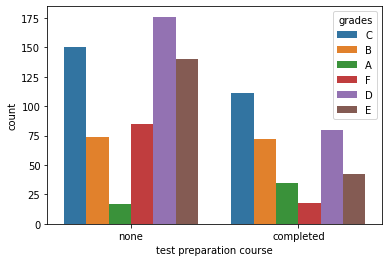

In [ ]:
sns.countplot(data=df,x='test preparation course',hue='grades')
plt.show()

In [ ]:
df[(df['grades']=='A')&(df['test preparation course']=='completed')]['grades'].count()

35

In [ ]:
df[(df['grades']=='A')&(df['test preparation course']=='none')]['grades'].count()

17

In [ ]:
CA=(35/358)*100
NA=(17/642)*100
print('Percentage of total students who received A grade after completing test preparation course:',CA,'%')
print('Percentage of total students who received A grade with no test preparation course:',NA,'%')

Percentage of total students who received A grade after completing test preparation course: 9.776536312849162 %
Percentage of total students who received A grade with no test preparation course: 2.64797507788162 %


It can be clearly seen that students who completed test preparation course have performed better at math. completion of test preparation course results in higher chances of getting better grades.